# Recruit Restaurant Visitor Forecasting

<a id='up'></a>

[Part 1: EDA on separate tables and sections](#part1)
    
  1.1.[Load libraries](#load-libraries)
    
  1.2.[Load all the data and aggregation](#data-agg)
    
  1.3.[Merge all dataset](#merge)


[Part 2: Distribution](#dis)

  2.1[Cartographic representation of data AIR and HPG](#cartographic)

  2.2[Genre distribution](#genre-dis)

  2.3[Distribution of visitors in the AIR system](#dis-visitors)
  
  2.4[Reservation distribution in systems](#res-dis)




## <a id='part1'>Part 1: EDA on separate tables and sections</a>

<a id='load-libraries'>1.1 Load libraries</a>

In [2]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

<a id='data-agg'>1.2 Load all the data and aggregation</a>

In [5]:
airres = pd.read_csv('./input/air_reserve.csv')
airstore = pd.read_csv('./input/air_store_info.csv')
hpgres = pd.read_csv('./input/hpg_reserve.csv')
hpgstore = pd.read_csv('./input/hpg_store_info.csv')
airvisit = pd.read_csv('./input/air_visit_data.csv')

In [6]:
airres.tail(2)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3


In [7]:
airvisit.head(2)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32


[Up to the header](#up)

<a id='merge'>1.3 Merge all dataset</a>

In [11]:
# merge air_reserve and air_store_info by inner join of air_store_id
df_air = pd.merge(airres,airstore,on='air_store_id')

# merge air_visit_data and air_store_info by inner join of air_store_id
df_airvis = pd.merge(airvisit,airstore,on='air_store_id')

# merge hpg_reserve and hpg_store_info by inner join of hpg_store_id
df_hpg = pd.merge(hpgres,hpgstore,on='hpg_store_id')

df_rel = pd.read_csv('./input/store_id_relation.csv')

df_airrel = pd.merge(df_air,df_rel,how='left',on='air_store_id')

df_hpgrel = pd.merge(df_hpg,df_rel,how='left',on='hpg_store_id')

df_full = pd.merge(df_airrel,df_hpgrel,how='outer')

print("there are ",len(df_air)," restaurants with AIR and ",len(df_hpg)," with HPG.",len(df_rel),' have both.')

there are  92378  restaurants with AIR and  871308  with HPG. 150  have both.


In [12]:
df_full.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,hpg_area_name
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN


In [13]:
df_full. describe()

,reserve_visitors,latitude,longitude
count,963686.000000,963686.000000,963686.000000
mean,5.253537,35.901246,137.469843
std,5.810087,2.349505,3.354441
min,1.000000,33.211967,130.339313
25%,2.000000,34.692109,135.483426
50%,3.000000,35.646745,139.373870
75%,6.000000,35.704527,139.737998
max,100.000000,44.020632,144.273398


In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963686 entries, 0 to 963685
Data columns (total 11 columns):
air_store_id        105906 non-null object
visit_datetime      963686 non-null object
reserve_datetime    963686 non-null object
reserve_visitors    963686 non-null int64
air_genre_name      92378 non-null object
air_area_name       92378 non-null object
latitude            963686 non-null float64
longitude           963686 non-null float64
hpg_store_id        907572 non-null object
hpg_genre_name      871308 non-null object
hpg_area_name       871308 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 88.2+ MB


[Up to the header](#up)

# <a id='dis'>Part 2: Distribution</a>

## <a id='cartographic'>2.1 Cartographic representation of data AIR and HPG</a>

In [13]:
import os
os.environ["PROJ_LIB"] = "C:\\Users\\sergey\\Anaconda3\\Library\\share";
from mpl_toolkits.basemap import Basemap

In [14]:
m = Basemap(projection='aeqd',width=2000000,height=2000000, lat_0=37.5, lon_0=138.2)

Text(0.5, 1.05, 'Air and HPG store restaurant')

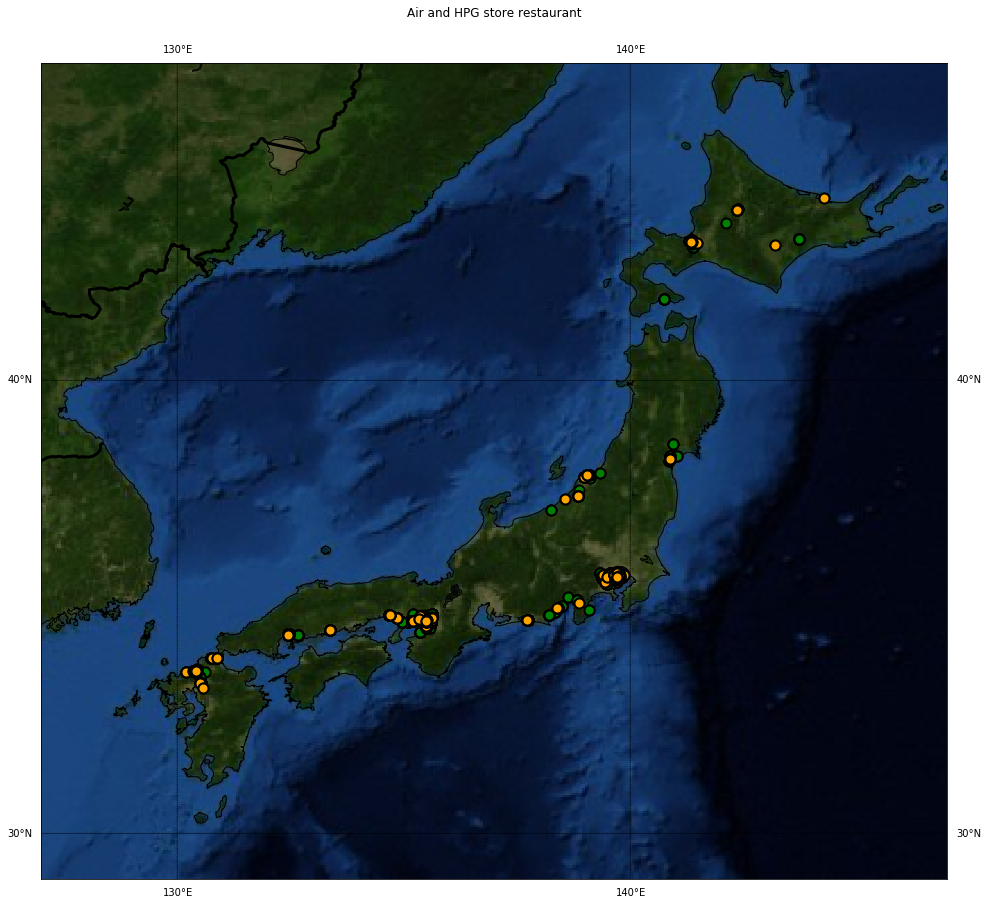

In [26]:
plt.figure(figsize=(20,15))
map = Basemap(resolution='i', llcrnrlon=127, urcrnrlon=147, 
              llcrnrlat=29, urcrnrlat=47, lat_0=0, lon_0=0,)
map.arcgisimage()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.5')
parallels = np.arange(0.,360,10.,)
map.drawparallels(parallels, labels = [True for s in range(len(parallels))])
meridians = np.arange(0.,360,10.,)
map.drawmeridians(meridians, labels = [True for s in range(len(meridians))])
for index, (y,x) in hpgstore[['latitude','longitude']].iterrows():
    x, y = map(x, y)
    map.plot(x, y, marker='o', markersize = 10, 
             markeredgewidth = 2, color = 'green',markeredgecolor='k')
for index, (y,x) in airstore[['latitude','longitude']].iterrows():
    x, y = map(x, y)
    map.plot(x, y, marker='o', markersize = 10, 
         markeredgewidth = 2, color = 'orange',markeredgecolor='k')
plt.title('Air and HPG store restaurant', y = 1.05)

[Up to the header](#up)

# <a id='genre-dis'>2.2 Genre distribution</a>

In [15]:
airstore.head(2)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


In [16]:
hpgstore.head(2)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


Text(0, 0.5, 'Number')

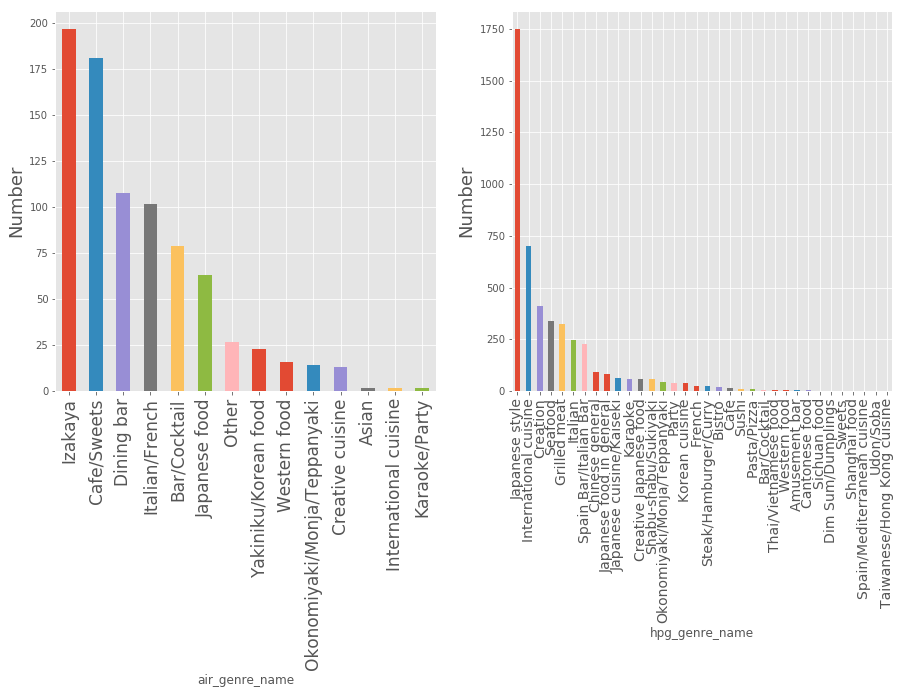

In [17]:
fig = plt.figure(figsize=(15,7))

# AIR
ax = fig.add_subplot(121)
temp = airstore.groupby("air_genre_name").count()['air_store_id'].sort_values(ascending=False)
temp.plot(kind='bar',width=0.5,ax=ax)
ax.set_xticklabels(temp.sort_values(ascending=False).index,fontsize=17)
plt.ylabel("Number",fontsize=18)

# HPG
ax = fig.add_subplot(122)
temp = hpgstore.groupby("hpg_genre_name").count()['hpg_store_id'].sort_values(ascending=False)
temp.plot(kind='bar',width=0.5,ax=ax)
ax.set_xticklabels(temp.sort_values(ascending=False).index,fontsize=14)
plt.ylabel("Number",fontsize=18)

[Up to the header](#up)

# <a id='dis-visitors'>2.3 Distribution of visitors in the AIR system</a>

In [18]:
airvisit.visit_date =pd.to_datetime(airvisit.visit_date)

Text(0, 0.5, 'Ave of visitors')

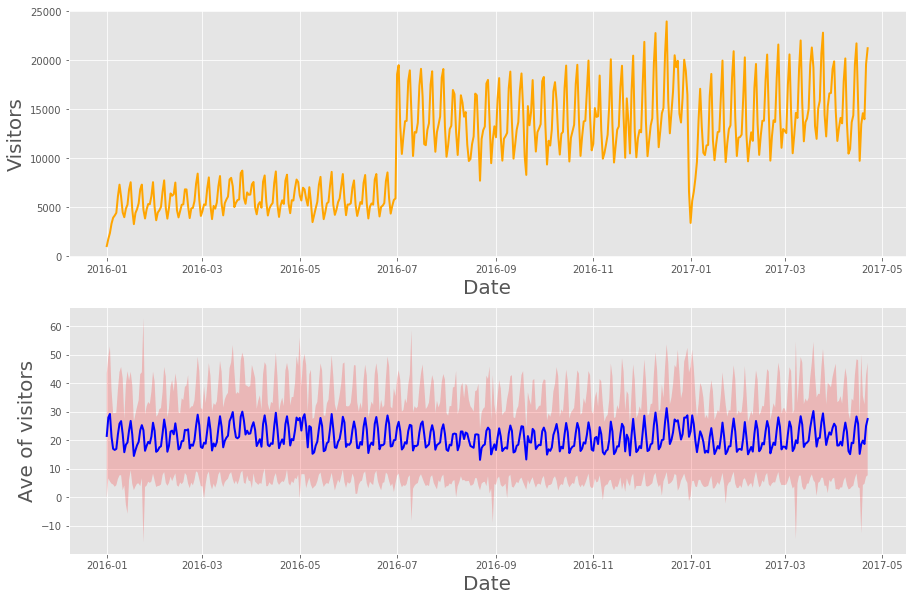

In [19]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(211)
temp = airvisit.groupby(['visit_date']).sum()
ax1.plot(temp,'orange',linewidth=2)
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('Visitors',fontsize=20)

ax2 = fig.add_subplot(212)
temp = airvisit.groupby(['visit_date']).mean()
ax2.plot(temp.index,temp.values,'blue',linewidth=2)
error = airvisit.groupby(['visit_date']).std()
ax2.fill_between(temp.index,(temp.values-error.values).T[0], (temp.values+error.values).T[0],
                facecolor='red', alpha=0.2)
ax2.set_xlabel('Date',fontsize=20)
ax2.set_ylabel('Ave of visitors',fontsize=20)

[Up to the header](#up)

Text(0, 0.5, 'Sum(Date per each store)')

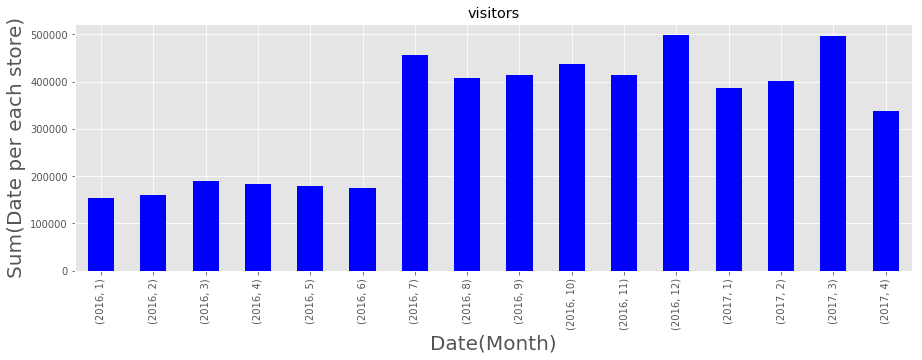

In [20]:
fig = plt.figure(figsize=(15,10))

ax3 = fig.add_subplot(211)
a = airvisit.groupby([(airvisit.visit_date.dt.year), 
                       (airvisit.visit_date.dt.month)]).sum()['visitors']
a.plot(kind='bar', width=0.5, figsize=(10,5), legend=None, 
       subplots=True, ax=ax3, title=None, color='blue')
plt.xlabel("Date(Month)", fontsize=20)
plt.ylabel("Sum(Date per each store)", fontsize=20)

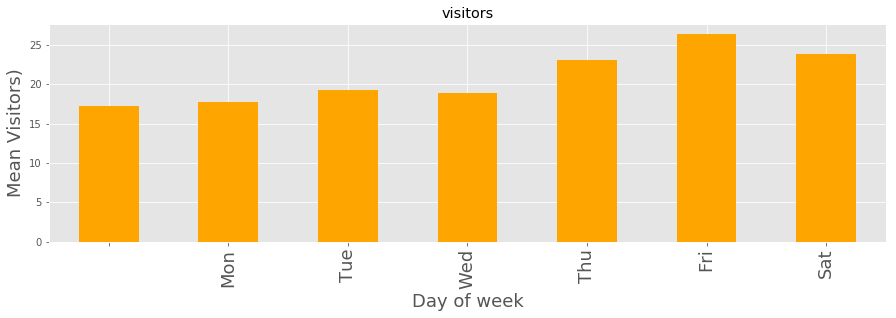

In [21]:
fig = plt.figure(figsize=(15,10))
ax4 = fig.add_subplot(212)
airvisit["dayofweek"] = airvisit.visit_date.dt.dayofweek
day_p=airvisit.groupby("dayofweek").mean()['visitors']
day_p.plot(kind='bar', color='orange', figsize=(10,5), legend=None, 
           subplots=True, ax=ax4, use_index=False, linewidth=3)
plt.ylabel("Mean Visitors)",fontsize=18)
plt.xlabel("Day of week",fontsize=18)
ax4.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

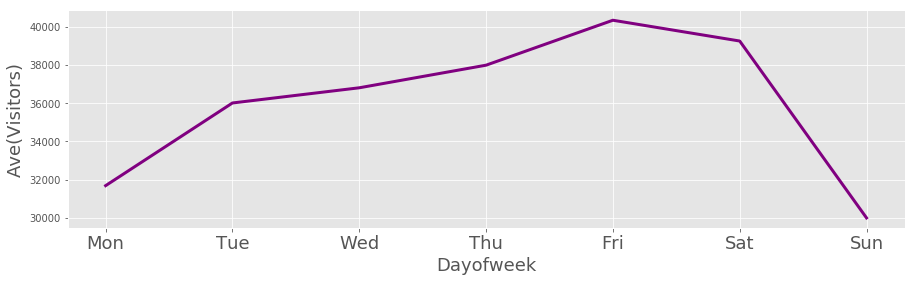

In [22]:
fig = plt.figure(figsize=(15,10))

ax5 = fig.add_subplot(212)
airvisit["dayofweek"] = airvisit.visit_date.dt.dayofweek
day_p=airvisit.groupby("dayofweek").count()['visitors']
day_p.plot(kind='line', color='purple', figsize=(10,5), legend=None, 
           subplots=True, ax=ax5, use_index=False, linewidth=3)
plt.ylabel("Ave(Visitors)",fontsize=18)
plt.xlabel("Dayofweek",fontsize=18)
ax5.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

[Up to the header](#up)

# <a id='res-dis'>2.4 Reservation distribution in systems</a>

In [23]:
airres.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [24]:
hpgres.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


[Up to the header](#up)

## Datetime Format

In [26]:
#AIR
airres['visit_datetime']=pd.to_datetime(airres['visit_datetime'])
airres['reserve_datetime']=pd.to_datetime(airres['reserve_datetime'])
airres['visit_hour']=airres['visit_datetime'].dt.hour
airres['reserve_hour']=airres['reserve_datetime'].dt.hour

#HPG
hpgres['visit_datetime']=pd.to_datetime(hpgres['visit_datetime'])
hpgres['reserve_datetime']=pd.to_datetime(hpgres['reserve_datetime'])
hpgres['visit_hour']=hpgres['visit_datetime'].dt.hour
hpgres['reserve_hour']=hpgres['reserve_datetime'].dt.hour

Text(0.5, 0, 'reserve_hour')

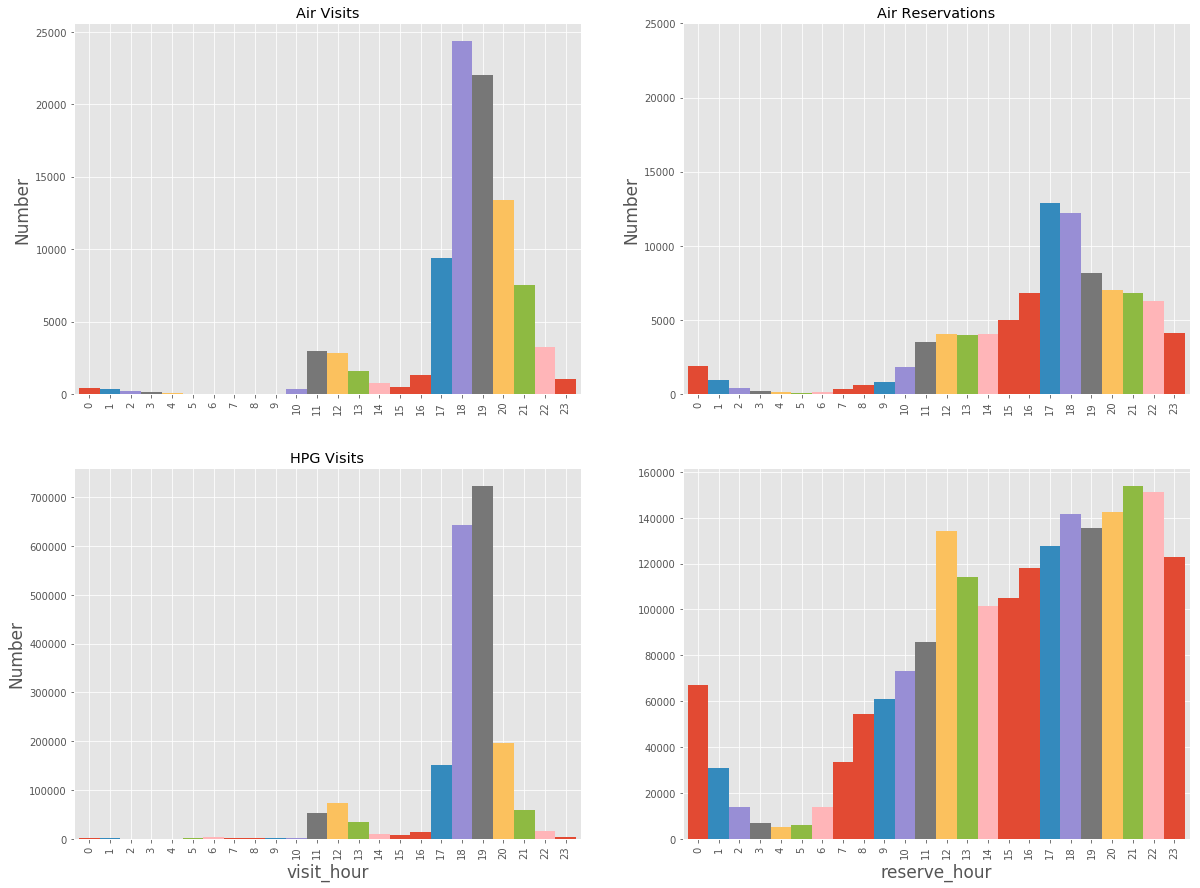

In [27]:
fig = plt.figure(figsize=(20,15))

ax=fig.add_subplot(221)
airres.groupby("visit_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax)
plt.xlabel("",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("Air Visits")

ax2=fig.add_subplot(222)
airres.groupby("reserve_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                     width=1, 
                                                                     ax=ax2)
plt.xlabel("",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("Air Reservations")
plt.ylim(0,25000)

ax3=fig.add_subplot(223)
hpgres.groupby("visit_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax3)
plt.xlabel("visit_hour",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("HPG Visits")

ax4=fig.add_subplot(224)
hpgres.groupby("reserve_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                     width=1, 
                                                                     ax=ax4)
plt.xlabel("reserve_hour",fontsize=17)

[Up to the header](#up)